**Example: Hotel booking demand data.** As a motivating example, we consider the Hotel booking demand data from the Kaggle Open Datasets ([link](https://www.kaggle.com/jessemostipak/hotel-booking-demand)). This is a publicly available data set with [many suggestions](https://www.kaggle.com/jessemostipak/hotel-booking-demand/notebooks?datasetId=511638&sortBy=voteCount) on how to analysis it. We consider two questions in this chapter. 

1. As a customer, predict the average daily rate (`adr`) using available features.
2. As a hotel manager, predict the cancellation (`is_canceled`) using available features. 

In [6]:
library(tidyverse)
hotel <- read_csv("../Data/hotel_bookings.csv") %>% print


-- Column specification ------------------------------------------------------------------------------------------------
cols(
  .default = col_double(),
  hotel = col_character(),
  arrival_date_month = col_character(),
  meal = col_character(),
  country = col_character(),
  market_segment = col_character(),
  distribution_channel = col_character(),
  reserved_room_type = col_character(),
  assigned_room_type = col_character(),
  deposit_type = col_character(),
  agent = col_character(),
  company = col_character(),
  customer_type = col_character(),
  reservation_status = col_character(),
  reservation_status_date = col_date(format = "")
)
i Use `spec()` for the full column specifications.




# A tibble: 119,390 x 32
   hotel is_canceled lead_time arrival_date_ye~ arrival_date_mo~
   <chr>       <dbl>     <dbl>            <dbl> <chr>           
 1 Reso~           0       342             2015 July            
 2 Reso~           0       737             2015 July            
 3 Reso~           0         7             2015 July            
 4 Reso~           0        13             2015 July            
 5 Reso~           0        14             2015 July            
 6 Reso~           0        14             2015 July            
 7 Reso~           0         0             2015 July            
 8 Reso~           0         9             2015 July            
 9 Reso~           1        85             2015 July            
10 Reso~           1        75             2015 July            
# ... with 119,380 more rows, and 27 more variables:
#   arrival_date_week_number <dbl>, arrival_date_day_of_month <dbl>,
#   stays_in_weekend_nights <dbl>, stays_in_week_nights <dbl>, adults <db

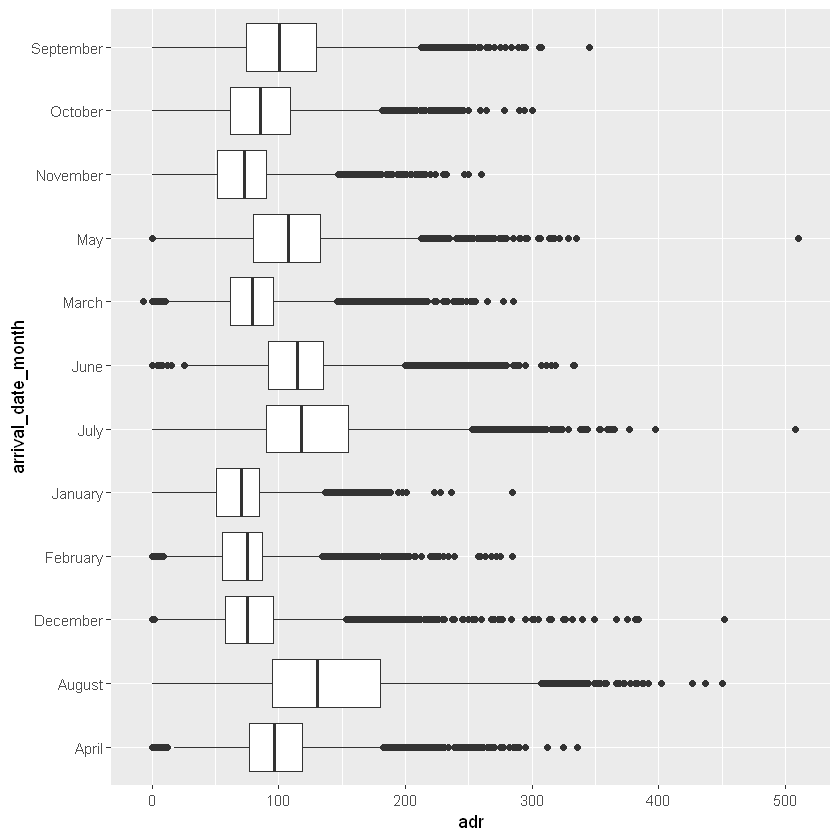

In [9]:
hotel %>% filter(adr<1000) %>% 
    ggplot(aes(arrival_date_month, adr))+
        geom_boxplot()+coord_flip()

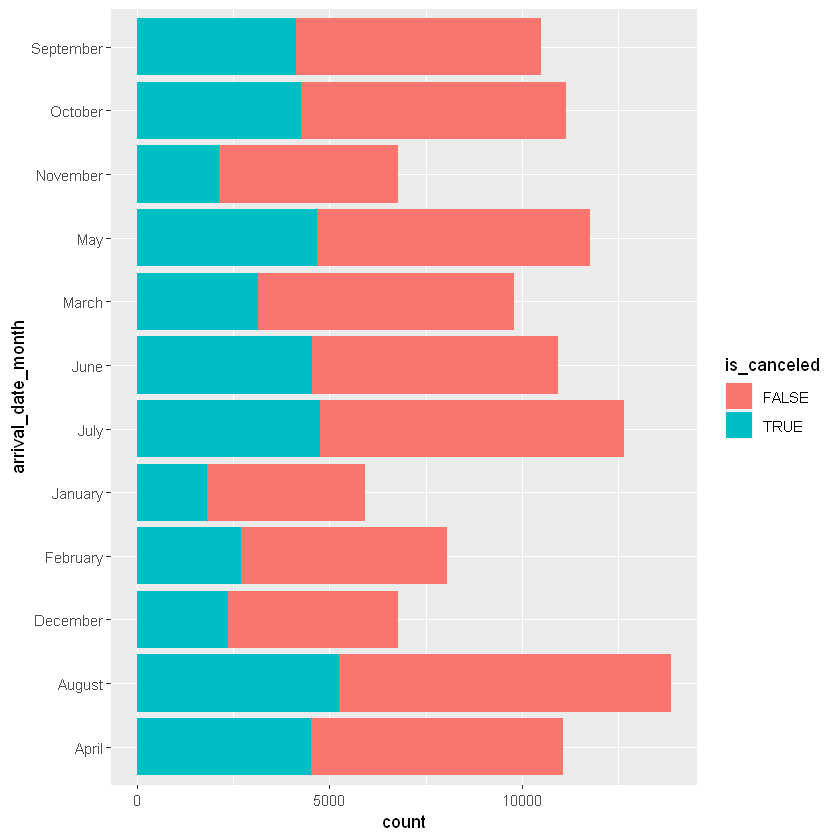

In [11]:
hotel %>% mutate(is_canceled=(is_canceled==1)) %>%
    ggplot(aes(arrival_date_month, ..count..))+
        geom_bar(mapping=aes(fill=is_canceled))+coord_flip()

In [12]:
# Consider a smaller set:
hotel<- hotel %>% select(is_canceled, adr, lead_time, total_of_special_requests, stays_in_week_nights, stays_in_weekend_nights, previous_cancellations)
hotel<- hotel %>% mutate(is_canceled = (is_canceled==1));
hotel<-hotel %>% filter(adr<1000)
hotel<-hotel[1:1000,] # use a smaller data set 
hotel %>% print

# A tibble: 1,000 x 7
   is_canceled   adr lead_time total_of_specia~ stays_in_week_n~
   <lgl>       <dbl>     <dbl>            <dbl>            <dbl>
 1 FALSE          0        342                0                0
 2 FALSE          0        737                0                0
 3 FALSE         75          7                0                1
 4 FALSE         75         13                0                1
 5 FALSE         98         14                1                2
 6 FALSE         98         14                1                2
 7 FALSE        107          0                0                2
 8 FALSE        103          9                1                2
 9 TRUE          82         85                1                3
10 TRUE         106.        75                0                3
# ... with 990 more rows, and 2 more variables: stays_in_weekend_nights <dbl>,
#   previous_cancellations <dbl>
